In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

%matplotlib inline
sns.set_style('whitegrid')

In [4]:
ccd = pd.read_csv('UCI_Credit_Card.csv', index_col='ID')
ccd.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
ccd.shape

(30000, 24)

In [6]:
ccd.rename(columns=lambda x: x.lower(), inplace=True)
ccd.rename(columns={'pay_0': 'pay_1'}, inplace=True)
ccd.rename(columns={'default.payment.next.month': 'default'}, inplace=True)

In [7]:
ccd.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [8]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   limit_bal  30000 non-null  float64
 1   sex        30000 non-null  int64  
 2   education  30000 non-null  int64  
 3   marriage   30000 non-null  int64  
 4   age        30000 non-null  int64  
 5   pay_1      30000 non-null  int64  
 6   pay_2      30000 non-null  int64  
 7   pay_3      30000 non-null  int64  
 8   pay_4      30000 non-null  int64  
 9   pay_5      30000 non-null  int64  
 10  pay_6      30000 non-null  int64  
 11  bill_amt1  30000 non-null  float64
 12  bill_amt2  30000 non-null  float64
 13  bill_amt3  30000 non-null  float64
 14  bill_amt4  30000 non-null  float64
 15  bill_amt5  30000 non-null  float64
 16  bill_amt6  30000 non-null  float64
 17  pay_amt1   30000 non-null  float64
 18  pay_amt2   30000 non-null  float64
 19  pay_amt3   30000 non-null  float64
 20  pay_am

In [9]:
ccd.default.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default, dtype: float64

In [10]:
ccd_ = ccd.copy()

### How does the probability of default payment vary by categories of different demographic variables?

In [11]:
def compute_cross_tabs(df, col_name, dict_category):
    cross_tab = pd.crosstab(ccd_['default'], ccd_[col_name], margins=True, normalize=False)
    cross_tab_nm = cross_tab / cross_tab.loc['All']

    # Rename columns
    cross_tab_nm.rename(columns=dict_category, inplace=True)
    
    # Plot the bar chart to see the distribution of default & Non default rate by col_name
    ax = cross_tab_nm.loc[[0, 1], list(dict_category.values())].T.plot.bar(rot=0, ylabel='Row counts in %', 
                                                            title=f'Distribution of Default vs Non default rate in (%) by {col_name}', 
                                                            figsize=(8, 6))
    # annotate chart with values
    for p in ax.patches:
        h, x = p.get_height(), p.get_x()
        xy = (x, h*1.025)
        ax.annotate(s=f'{round(h*100, 2)}%', xy=xy)
    
    # Save the figure
    plt.savefig(f'{col_name}.png')

2    18112
1    11888
Name: sex, dtype: int64


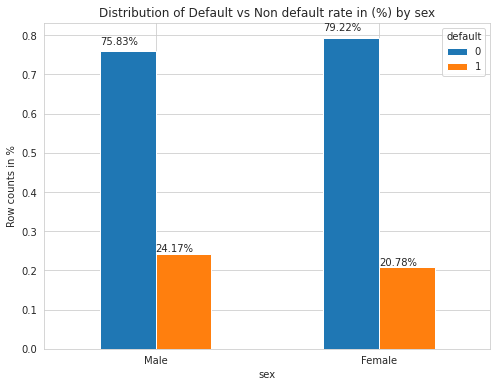

In [12]:
# Gender: (1 = male, 2 = female)
# Check the distribution of gender in the whole dataset
print(ccd_.sex.value_counts(normalize=False))

# Plotting bar chart
compute_cross_tabs(ccd_, 'sex', {1: 'Male', 2: 'Female'})

> - We can see from the above plot that default rate in males marginally ahead of females by less than 4% even when there are 20% more females in the dataset. To understand further, we can dig a bit deeper to find what age group in both male and female defaults the most.

<Figure size 720x432 with 0 Axes>

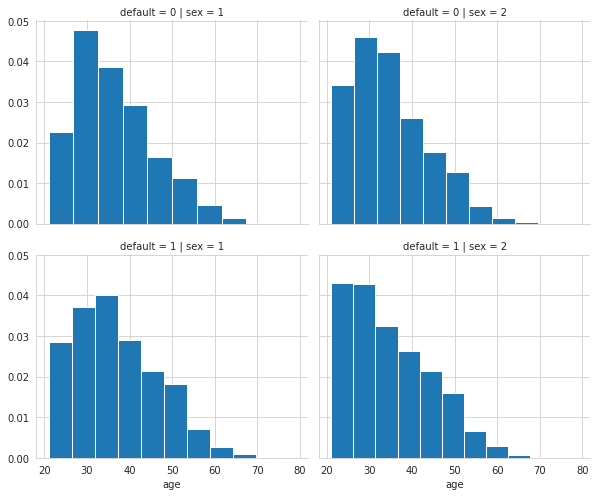

In [13]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(ccd_, row='default', col='sex', height=3.5, aspect=1.20)
g.map(plt.hist, 'age', density=True);

# Save figure
plt.savefig('sex-default-age.png')

> - As seen in the graph, the majority of defaulters and non defaulters in both the gender lies in the age group of approximately 20-35 and follow a decreasing trend as the age of the customers increases. This could possibly mean that credit cards were largely issued to the young people since 75% of the customers in the dataset has age less than 41 years.

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: marriage, dtype: float64


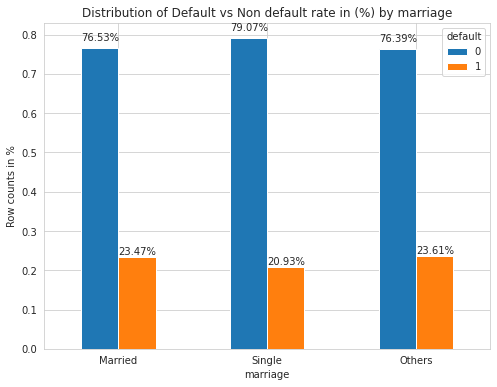

In [14]:
# Marital status: (1=married, 2=single, 3=others)
print(ccd_.marriage.value_counts(normalize=True))

# Transform the undocumented value (of 0) to 3 
# since 'others' category accounts for just around 1% values in the dataset.
ccd_.loc[(ccd_['marriage'] > 2) | (ccd_['marriage'] < 1), 'marriage'] = 3

compute_cross_tabs(ccd_, 'marriage', {1: 'Married', 2: 'Single', 3: 'Others'})

> - Not much of a difference between marriage categories w.r.t default and non default rate.  

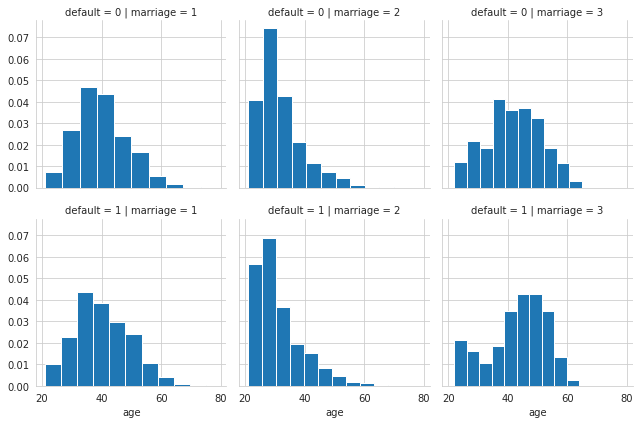

In [15]:
g = sns.FacetGrid(ccd_, row='default', col='marriage')
g.map(plt.hist, 'age', density=True);

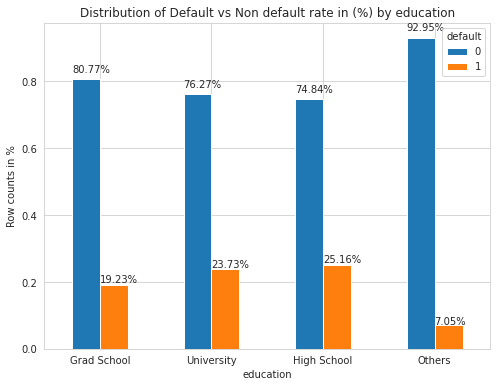

In [16]:
# Education: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
ccd_.education.value_counts(normalize=True)

# Transform unknown categories to others.
ccd_.loc[(ccd_['education'] > 4) | (ccd_['education'] < 1), 'education'] = 4

compute_cross_tabs(ccd_, 'education', {1: 'Grad School', 2: 'University', 3: 'High School', 4: 'Others'})



> It is very tempting to infer from the plot that 'Others' category has the least default rate of all groups. However, the column have values that were listed as unknowns (probably filled in for missing values) and some values undocumented in the data dictionary. Hence those categories were grouped as 'Others'. 


> Nonetheless, there are insignificant differences found between High School and University passout clients. However, unsurprisingly, grad school clients are less defaulters compared to rest since graduates are more likely to get a high salary jobs that might make them pay their dues.

### 2. What age group do people with high line of credit belong to?

- To answer this question, it is important to define what high line of credit is. I assume that credit limit greater than 75th percentile (top 25%) is what high borrowing limit means.

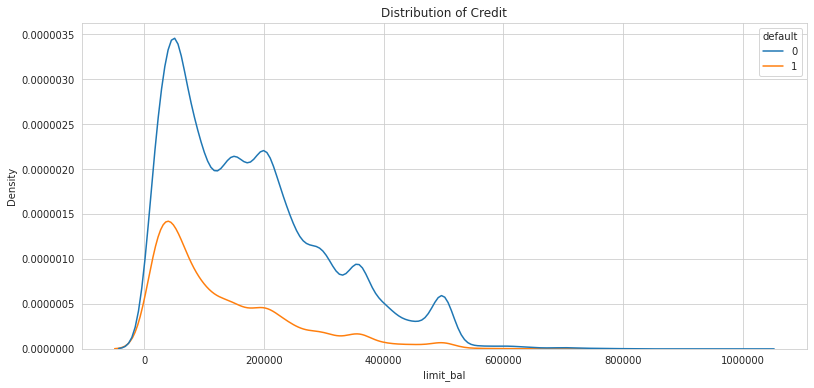

In [17]:
# Credit distribution of payers vs non-payers
fig, ax = plt.subplots(figsize=(13, 6))
sns.kdeplot(data=ccd_, x='limit_bal', hue='default', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title('Distribution of Credit')

# Save the figure
plt.savefig('credit_limit.png')

> - The density plot illustrates people with high credit limit have significantly lower default percentage. This makes sense since a bank must have verified applicants history before issuing such high credit.  

In [18]:
# Bin values into distinct categories
bins = [20,30,40,50,60,70,80]
names = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
ccd_['age_group'] = pd.cut(x=ccd_.age, bins=bins, labels=names, right=True)

In [19]:
# Compute and extract rows > 75th percentile
limit_bal75 = ccd_.limit_bal.quantile(0.75)
top25_high_credit = ccd_.loc[ccd_['limit_bal'] > limit_bal75, :]

In [20]:
top25_high_credit.shape

(7067, 25)

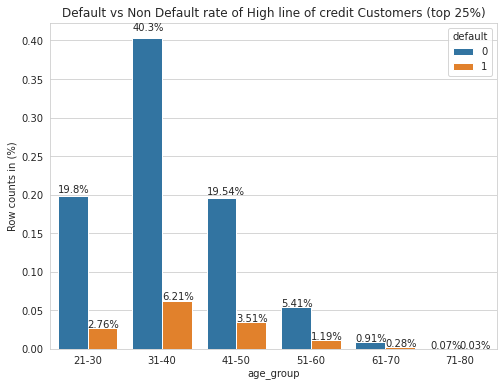

In [21]:
# Count the number of clients in each age group.
grouped_df = top25_high_credit.groupby(['age_group', 'default']).size() / top25_high_credit.shape[0]
grouped_df = grouped_df.reset_index(name='counts')

# add the plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=grouped_df, x='age_group', y='counts', hue='default', ax=ax);

# annotate the plot
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x, h*1.025)
    ax.annotate(s=f'{round(h*100,2)}%', xy=xy)

ax.set_title('Default vs Non Default rate of High line of credit Customers (top 25%)')
ax.set(ylabel='Row counts in (%)')

# Save the figure
plt.savefig('age-group.png')
plt.show()

> - The bar chart clearly shows the high credit holders belong to the age group of 31-40 (around 46%), while the age groups 41-50 and 21-30 stands at second and third place respectively. Moreover, the default rate follows the same trend as the non default rate with age group 31-40 at the top.
- We can try to find what proportion of this age group (31-40) have completed grad school because only after careful consideration by the bank, it issues an applicant a high credit limit.

In [22]:
# What proportion of age group (31-40) have finished their grad school?
top25_high_credit.loc[top25_high_credit['age_group'] == '31-40']['education'].value_counts(normalize=True)

1    0.543657
2    0.364770
3    0.076666
4    0.014907
Name: education, dtype: float64

> - More than half the population (of age group 31-40) have concluded grad school. Around 36% have finished University education while the remaining categories stand at roughly 8%. 

### 3. Which variables are the strongest predictors of default payment?

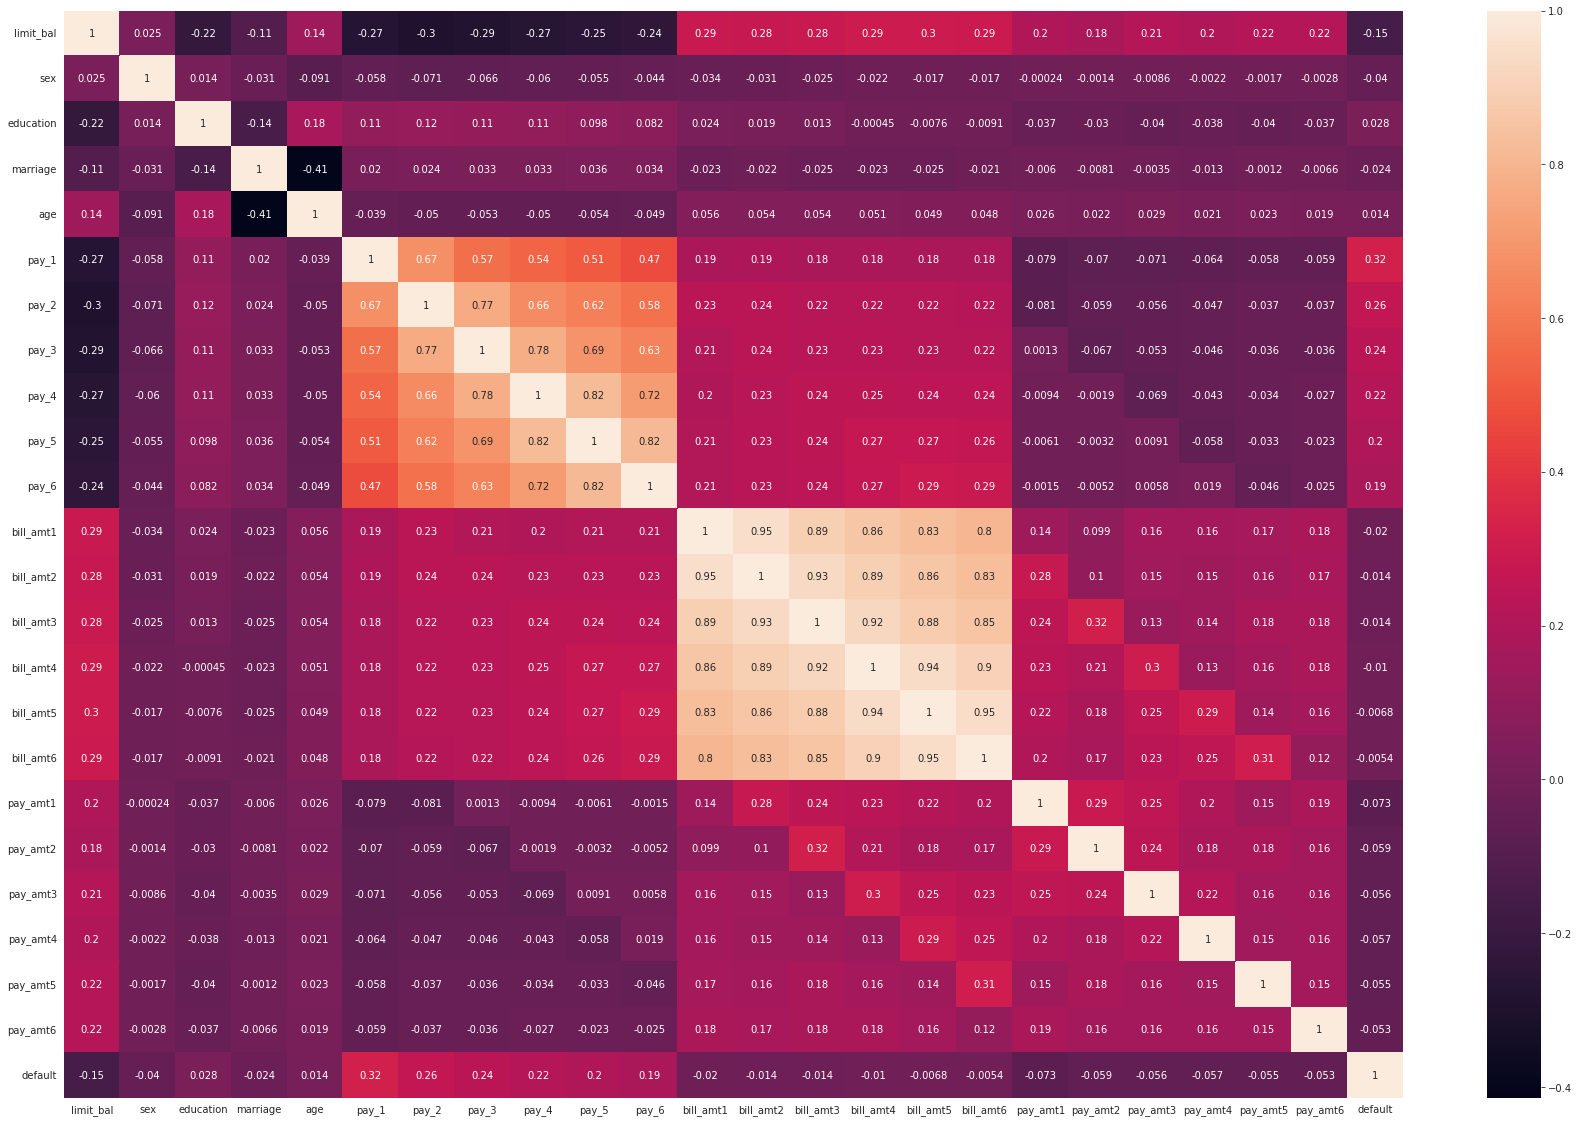

In [23]:
# Heatmap to understand correlation between features & target column
plt.subplots(figsize=(30,20))
sns.heatmap(ccd.corr(), annot=True)
plt.show()

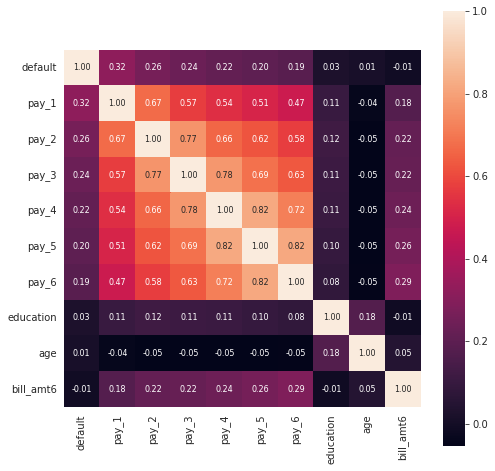

In [24]:
k = 10 #number of variables for heatmap
corrmat = ccd.corr()
cols = corrmat.nlargest(k, 'default')['default'].index
cm = np.corrcoef(ccd[cols].values.T)
# sns.set(font_scale=1.25)
plt.subplots(figsize=(8,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)

# Save the figure
plt.savefig('heatmap.png')
plt.show()



> - Clearly, we can see from above two plots there aren't any features highly correlated with the target feature. However, the next month default prediction is dependent on the repayment status of last 6 months especially the repayment status in September. We can also see the multicollinearity between repayment status features.
> - First, we will try to train the model with all the features and then based on the result reduce the unnecessary predictors.    



In [25]:
# Transform the 0 and 3 values to 3
ccd.loc[(ccd['marriage'] > 2) | (ccd['marriage'] < 1), 'marriage'] = 3

# Numerical features
pay_amt_features = ['pay_amt'+str(i) for i in range(1, 7)]
bill_amt_features = ['bill_amt'+str(i) for i in range(1, 7)]
numerical_features = ['limit_bal', 'age'] + pay_amt_features + bill_amt_features


# Creating binary features
ccd['male'] = (ccd['sex'] == 1).astype(int)
ccd['married'] = (ccd['marriage'] == 1).astype(int)
ccd['grad_school'] = (ccd['education'] == 1).astype(int)
ccd['university'] = (ccd['education'] == 2).astype(int)
# ccd['high_school'] = (ccd['education'] == 3).astype(int)


# Transform the -1 and -2 values to 0
pay_features = ['pay_'+str(i) for i in range(1, 7)]
for col in pay_features:
    ccd.loc[ccd[col] <= 0, col] = 0

In [26]:
numerical_features = numerical_features + pay_features
binary_features = ['male', 'married', 'grad_school', 'university']
X = ccd[numerical_features + binary_features]
y = ccd['default']


# Spliting data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=5, stratify=y)


# Standardize the numerical features so they are in the same scale with a mean of 0 and std of 1
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [27]:
# MODEL 1: LOGISTIC REGRESSION + all features
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg_1 = log_reg.predict(X_test)

In [28]:
# ROC & AUC
def calculate_metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(f'Confusion Matrix \n{confusion_matrix(y_test, y_pred)}')
    print(f'Accuracy Score of a model on test set is {accuracy_score(y_test, y_pred)}')

    fpr, tpr, thresh = roc_curve(y_test, y_pred)
    auc_score_log_reg = roc_auc_score(y_test, y_pred)
    print(f'The AUC score is {auc_score_log_reg}')

    plt.plot(fpr, tpr)
    plt.title(f'ROC with AUC score of {round(auc_score_log_reg, 3)}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500

Confusion Matrix 
[[5825   16]
 [1659    0]]
Accuracy Score of a model on test set is 0.7766666666666666
The AUC score is 0.49863037151172745


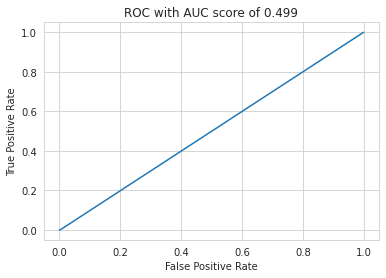

In [29]:
# Print the metrics
calculate_metrics(y_test, y_pred_log_reg_1)

> - The model performance is absolutely bad in terms of classifying positive points correctly with all the features. However, the negative points are almost identified correctly by the model. The ROC curve with AUC score of 0.50 shows that the classifier either predicts random class or constant class for all data points and is not able to distinguish between positive and negative classes. 

> - We remove repayment status features since those features are correlated with each other and try to compressed that information into a new feature called months delayed. 



In [30]:
# Creating delayed features: 1 if repayment status > 0 else 0
delayed_features = ['delayed_'+str(i) for i in range(1, 7)]
for pay, delayed in zip(pay_features, delayed_features):
    ccd[delayed] = (ccd[pay] > 0).astype(int)

# Creating a new feature: months delayed
ccd['months_delayed'] = ccd[delayed_features].sum(axis=1)

In [31]:
numerical_features = numerical_features + ['months_delayed']
binary_features = ['male', 'married', 'grad_school', 'university']
X = ccd[numerical_features + binary_features]
y = ccd['default']


# Spliting data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)


# Standardize the numerical features so they are in the same scale with a mean of 0 and std of 1
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [32]:
# MODEL 2: LOGISTIC REGRESSION + without pay_{1, 6} features + months_delayed feature
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg_2 = log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5841
           1       0.07      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.42      0.50      0.44      7500
weighted avg       0.62      0.78      0.68      7500

Confusion Matrix 
[[5815   26]
 [1657    2]]
Accuracy Score of a model on test set is 0.7756
The AUC score is 0.49837712646122856


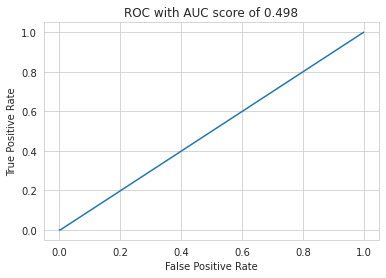

In [33]:
# Print the metrics (Model 2)
calculate_metrics(y_test, y_pred_log_reg_2)



> - No improvement at all in model performance.



In [34]:
numerical_features = numerical_features + pay_features
binary_features = ['male', 'married', 'grad_school', 'university']
X = ccd[numerical_features + binary_features]
y = ccd['default']


# Spliting data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)


# # Standardize the numerical features so they are in the same scale with a mean of 0 and std of 1
# scaler = StandardScaler()
# scaler.fit(X_train[numerical_features])
# X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [35]:
# MODEL 3: RANDOM FOREST
# rand_forest = RandomForestClassifier(random_state=5)
# rand_forest.fit(X_train, y_train)

# # Predict
# y_pred_rf_3 = rand_forest.predict(X_test)

In [36]:
# rand_forest.get_params()

In [37]:
# Print the metrics (Model 3)
# calculate_metrics(y_test, y_pred_rf_3)

In [ ]:
# MODEL 4: RANDOM FOREST (HYPERPARAMETER TUNING)
rand_forest = RandomForestClassifier(random_state=5)
param_grid = { 
    'n_estimators': [400, 500, 650],
    'min_samples_split': [6, 7, 8],
    'min_samples_leaf': [6, 7, 8],
    'max_depth' : [6, 7, 8],
}

rf_cv = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=5)
rf_cv.fit(X_train, y_train)

print(f'Best parameters of the model: {rf_cv.best_params_}')
print(f'Best CV score of the best estimator: {rf_cv.best_score_}')

In [ ]:
rand_forest_4 = RandomForestClassifier(n_estimators=500, max_depth=6, min_samples_split=6)
rand_forest_4.fit(X_train, y_train)

# Predict
y_pred_rf_4 = rand_forest_4.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.68      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix 
[[5568  273]
 [1082  577]]
Accuracy Score of a model on test set is 0.8193333333333334
The AUC score is 0.6505306536415741


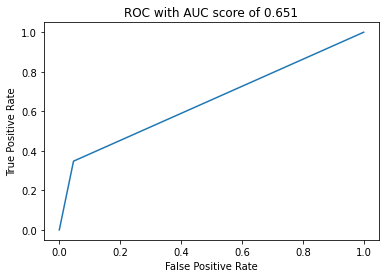

In [ ]:
# Print the metrics (Model 4)
calculate_metrics(y_test, y_pred_rf_4)